In [24]:
import pandas as pd
import numpy as np
import requests
import re
import json
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point,Polygon,shape

In [72]:
df=pd.read_csv(r'C:\Users\飘哥\Desktop\数据爬取\OD数据.csv',encoding='gb2312')
df=df[:1]
df

,FSTR_ONAME,FSTR_DNAME,SLat,SLng,ELat,ELng
0,曹路,嘉定北,31.274748,121.677908,31.393509,121.233045


In [73]:
url ="http://api.map.baidu.com/direction/v2/transit?" #API地址
ak = '**********' #秘钥
#参数设置为wgs84坐标系和地铁优先
real_url = url +"coord_type=wgs84&tactics_incity=5&origin="+str(df.SLat[0])+","+str(df.SLng[0])+"&destination="+str(df.ELat[0])+","+str(df.ELng[0])+"&ak="+ak #完整的请求代码
req = requests.get(real_url)
t = req.text
data = json.loads(t) #将数据保存在数组data中
# zz=pd.json_normalize(data['result']['routes'][0]['steps'][0][0]['vehicle_info']['detail']['stop_info'])
# zz.columns=['name','lng','lat']
# xyList = [xy for xy in zip(zz.lng, zz.lat)]
# data['geometry']=LineString(xyList)
data

{'status': 0,
 'type': 2,
 'result': {'routes': [{'distance': 57603,
    'duration': 6189,
    'arrive_time': '2021-04-27 16:12:09',
    'price': 9,
    'price_detail': [{'ticket_type': 1, 'ticket_price': 9}],
    'steps': [[{'distance': 336,
       'duration': 284,
       'instructions': '步行336米',
       'path': '121.68810249911,31.278868588792;121.68831809243,31.278367074273;121.68841690604,31.278135605125;121.68865944853,31.277518351259;121.68876724519,31.277634086669;121.689225381,31.277703527847;121.689225381,31.27771124353;121.68918046572,31.277834694375;121.68918046572,31.277834694375;121.68920741489,31.277834694375;121.68957572015,31.27791185107;121.68965656764,31.277580076829;121.68944097432,31.277541498352;121.68944097432,31.277541498352;121.68944097432,31.277541498352',
       'traffic_condition': [],
       'start_location': {'lng': 121.68860555019, 'lat': 31.279030615985},
       'end_location': {'lng': 121.68944097432, 'lat': 31.277549214049},
       'vehicle_info': {'typ

In [91]:
result=[]
for i in range(0,len(data['result']['routes'][0]['steps'])):
    dd=data['result']['routes'][0]['steps'][i]
    result.append(pd.DataFrame(re.findall("start_name': '(.*?)'",str(dd))).applymap(lambda x:x.split('站')[0]))
    result.append(pd.DataFrame(re.findall("stop_name': '(.*?)'",str(dd))))
    result.append(pd.DataFrame(re.findall("end_name': '(.*?)'",str(dd))).applymap(lambda x:x.split('站')[0]))
result=pd.concat(result,0).drop_duplicates().reset_index(drop=True)
result.columns=['name']
station=pd.read_excel(r'C:\Users\飘哥\Desktop\组合站点经纬度.xlsx')
stop=pd.merge(result,station,on='name')
stop['FSTR_ONAME']=stop.name.iloc[0]
stop['FSTR_DNAME']=stop.name.iloc[-1]
stop

,name,lat,lon,FSTR_ONAME,FSTR_DNAME
0,曹路,31.274748,121.677908,曹路,嘉定北
1,民雷路,31.269614,121.664353,曹路,嘉定北
2,顾唐路,31.267558,121.652469,曹路,嘉定北
3,金海路,31.265575,121.634550,曹路,嘉定北
4,金吉路,31.266232,121.624250,曹路,嘉定北
5,金桥,31.263874,121.606100,曹路,嘉定北
6,台儿庄路,31.254836,121.593622,曹路,嘉定北
7,蓝天路,31.243101,121.573514,曹路,嘉定北
8,芳甸路,31.234111,121.554221,曹路,嘉定北
9,杨高中路,31.229666,121.544432,曹路,嘉定北


In [93]:
xyList = [xy for xy in zip(stop.lon,stop.lat)]
line_1=df.copy()
line_1['geometry']=LineString(xyList)
line_1=gpd.GeoDataFrame(line_1)
line_1

,FSTR_ONAME,FSTR_DNAME,SLat,SLng,ELat,ELng,geometry
0,曹路,嘉定北,31.274748,121.677908,31.393509,121.233045,"LINESTRING (121.67791 31.27475, 121.66435 31.2..."


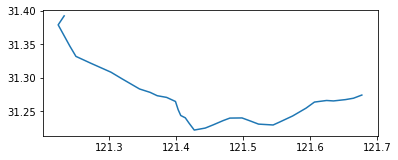

In [94]:
line_1.plot()

## 对一个方向的轨道线进行gis处理

In [95]:
#停靠点数据转化为geopandas类型
from shapely.geometry import Point,Polygon
stop_1=stop.copy()
stop_1['geometry'] = stop_1.apply(lambda r:Point(r['lon'],r['lat']),axis = 1)
stop_1 = gpd.GeoDataFrame(stop_1)
stop_1

,name,lat,lon,FSTR_ONAME,FSTR_DNAME,geometry
0,曹路,31.274748,121.677908,曹路,嘉定北,POINT (121.67791 31.27475)
1,民雷路,31.269614,121.664353,曹路,嘉定北,POINT (121.66435 31.26961)
2,顾唐路,31.267558,121.652469,曹路,嘉定北,POINT (121.65247 31.26756)
3,金海路,31.265575,121.634550,曹路,嘉定北,POINT (121.63455 31.26557)
4,金吉路,31.266232,121.624250,曹路,嘉定北,POINT (121.62425 31.26623)
5,金桥,31.263874,121.606100,曹路,嘉定北,POINT (121.60610 31.26387)
6,台儿庄路,31.254836,121.593622,曹路,嘉定北,POINT (121.59362 31.25484)
7,蓝天路,31.243101,121.573514,曹路,嘉定北,POINT (121.57351 31.24310)
8,芳甸路,31.234111,121.554221,曹路,嘉定北,POINT (121.55422 31.23411)
9,杨高中路,31.229666,121.544432,曹路,嘉定北,POINT (121.54443 31.22967)


In [96]:
# 首先，我们来将轨道切成段
#把 点 和 线 都变成整体
#对geodataframe执行unary_union操作后，他们都会变成一个shapely的geometry对象
stop_1_geo = stop_1.unary_union
line_1_geo = line_1.unary_union

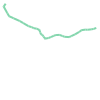

In [97]:
#切分
from shapely.ops import split
#用shapely的split功能切分线，这里，因为点的位置不一定在线上（就算在线上，由于小数点取值问题也可能不会精确的在线上）
#所以，对点进行buffer以后，再用buffer来切分线
split_line = split(line_1_geo,stop_geo.buffer(0.0008))
split_line

In [98]:
len(stop)

34

In [99]:
len(split_line)

67

In [132]:
#切分后的线段
splited_line=gpd.GeoDataFrame({'geometry':split_line})
splited_line['FSTR_ONAME'] = line.FSTR_ONAME.iloc[0]
splited_line['FSTR_DNAME'] = line.FSTR_DNAME.iloc[0]
splited_line

,geometry,FSTR_ONAME,FSTR_DNAME
0,"LINESTRING (121.67791 31.27475, 121.67716 31.2...",曹路,嘉定北
1,"LINESTRING (121.67716 31.27446, 121.66510 31.2...",曹路,嘉定北
2,"LINESTRING (121.66510 31.26990, 121.66435 31.2...",曹路,嘉定北
3,"LINESTRING (121.66357 31.26948, 121.65326 31.2...",曹路,嘉定北
4,"LINESTRING (121.65326 31.26769, 121.65247 31.2...",曹路,嘉定北
...,...,...,...
62,"LINESTRING (121.24135 31.34667, 121.24095 31.3...",曹路,嘉定北
63,"LINESTRING (121.24056 31.34805, 121.22385 31.3...",曹路,嘉定北
64,"LINESTRING (121.22385 31.37845, 121.22347 31.3...",曹路,嘉定北
65,"LINESTRING (121.22391 31.37982, 121.23260 31.3...",曹路,嘉定北


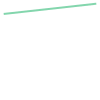

In [131]:
lineshp=splited_line.geometry.iloc[5]
lineshp

In [136]:
len(splited_line.geometry)

67

In [102]:
#起点坐标是
startlon,startlat = lineshp.coords[0]
#终点坐标是
endlon,endlat = lineshp.coords[-1]

In [106]:
stop_1

,name,lat,lon,FSTR_ONAME,FSTR_DNAME,geometry,dis
0,曹路,31.274748,121.677908,曹路,嘉定北,POINT (121.67791 31.27475),0.001030
1,民雷路,31.269614,121.664353,曹路,嘉定北,POINT (121.66435 31.26961),0.017658
2,顾唐路,31.267558,121.652469,曹路,嘉定北,POINT (121.65247 31.26756),0.031598
3,金海路,31.265575,121.634550,曹路,嘉定北,POINT (121.63455 31.26557),0.051500
4,金吉路,31.266232,121.624250,曹路,嘉定北,POINT (121.62425 31.26623),0.061143
5,金桥,31.263874,121.606100,曹路,嘉定北,POINT (121.60610 31.26387),0.081651
6,台儿庄路,31.254836,121.593622,曹路,嘉定北,POINT (121.59362 31.25484),0.103168
7,蓝天路,31.243101,121.573514,曹路,嘉定北,POINT (121.57351 31.24310),0.135011
8,芳甸路,31.234111,121.554221,曹路,嘉定北,POINT (121.55422 31.23411),0.163292
9,杨高中路,31.229666,121.544432,曹路,嘉定北,POINT (121.54443 31.22967),0.177527


In [107]:
stop_1['dis'] = abs(stop_1['lon']-startlon)+abs(stop_1['lat']-startlat)
start = stop_1[stop_1['dis'] == stop_1['dis'].min()]['name'].iloc[0]

stop_1['dis'] = abs(stop_1['lon']-endlon)+abs(stop_1['lat']-endlat)
end = stop_1[stop_1['dis'] == stop_1['dis'].min()]['name'].iloc[0]
start,end

('曹路', '民雷路')

## 输入是线段和站点信息，输出是起终点站点名称 

In [112]:
def getstartendstation(lineshp,stop_1):
    #起点坐标是
    startlon,startlat = lineshp.coords[0]
    #终点坐标是
    endlon,endlat = lineshp.coords[-1]
    stop_1['dis'] = abs(stop_1['lon']-startlon)+abs(stop_1['lat']-startlat)
    start = stop_1[stop_1['dis'] == stop_1['dis'].min()]['name'].iloc[0]

    stop_1['dis'] = abs(stop_1['lon']-endlon)+abs(stop_1['lat']-endlat)
    end = stop_1[stop_1['dis'] == stop_1['dis'].min()]['name'].iloc[0]
    return start,end

In [123]:
getstartendstation(lineshp,stop_1)

('曹路', '民雷路')

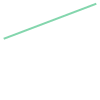

In [122]:
lineshp=splited_line.geometry.iloc[1]
lineshp

In [114]:
len(splited_line.geometry)

67

In [179]:
lines_name=[]
for i in range(0,len(splited_line.geometry)):
    lineshp=splited_line.geometry.iloc[i]
    lines_name.append(pd.DataFrame(getstartendstation(lineshp,stop_1)).T)
lines_name=pd.concat(lines_name,0).reset_index(drop=True)
lines_name.columns=['station_a','station_b']
lines_name
    
    

,station_a,station_b
0,曹路,曹路
1,曹路,民雷路
2,民雷路,民雷路
3,民雷路,顾唐路
4,顾唐路,顾唐路
...,...,...
62,白银路,白银路
63,白银路,嘉定西
64,嘉定西,嘉定西
65,嘉定西,嘉定北


In [181]:
#重复的是切割的空档，要剔除
splited_lines=pd.concat([splited_line,lines_name],axis=1).query('station_a!=station_b').reset_index(drop=True)
splited_lines

,geometry,FSTR_ONAME,FSTR_DNAME,station_a,station_b
0,"LINESTRING (121.67716 31.27446, 121.66510 31.2...",曹路,嘉定北,曹路,民雷路
1,"LINESTRING (121.66357 31.26948, 121.65326 31.2...",曹路,嘉定北,民雷路,顾唐路
2,"LINESTRING (121.65167 31.26747, 121.63534 31.2...",曹路,嘉定北,顾唐路,金海路
3,"LINESTRING (121.63375 31.26563, 121.62505 31.2...",曹路,嘉定北,金海路,金吉路
4,"LINESTRING (121.62346 31.26613, 121.60689 31.2...",曹路,嘉定北,金吉路,金桥
5,"LINESTRING (121.60545 31.26341, 121.59427 31.2...",曹路,嘉定北,金桥,台儿庄路
6,"LINESTRING (121.59293 31.25443, 121.57420 31.2...",曹路,嘉定北,台儿庄路,蓝天路
7,"LINESTRING (121.57279 31.24276, 121.55495 31.2...",曹路,嘉定北,蓝天路,芳甸路
8,"LINESTRING (121.55349 31.23378, 121.54516 31.2...",曹路,嘉定北,芳甸路,杨高中路
9,"LINESTRING (121.54363 31.22971, 121.52346 31.2...",曹路,嘉定北,杨高中路,世纪大道


In [177]:
# splited_lines.to_file(r'C:\Users\飘哥\Desktop\上海行政区\等时圈\od2.shp',encoding='utf-8')